Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [13]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv('data/NEW DATA .csv')

In [4]:
df.head()

,InvoiceNo,Stock Code,Description,Quantity,InvoiceDate,UnitPrice,Customer ID,Country,Age,Salary
0,489895,22130,PARTY CONE CHRISTMAS DECORATION,12,12/3/09 7:25 AM,0.85,12779,Poland,23,56463
1,489895,21432,SET OF 3 CASES WOODLAND DESIGN,2,12/3/09 7:25 AM,5.95,12779,Poland,23,56463
2,489895,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/3/09 7:25 AM,1.25,12779,Poland,23,56463
3,489895,37448,CERAMIC CAKE DESIGN SPOTTED MUG,24,12/3/09 7:25 AM,1.49,12779,Poland,23,56463
4,489895,37494A,FAIRY CAKE CERAMIC BUTTER DISH,6,12/3/09 7:25 AM,2.95,12779,Poland,23,56463


In [6]:
# Feature Engineering
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']  # Calculate total spent per transaction
df['CustomerType'] = pd.cut(df['TotalSpent'], bins=[0, 10, 50, 100, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])  # Create a customer type variable based on total spent


In [7]:
# Split the data into features and target
X = df[['Quantity', 'UnitPrice']]
y = df['TotalSpent']

In [8]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((466, 2), (117, 2))

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')   

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 29.8946
- Mean Absolute Error: 11.3464
- R2 Score: 0.4071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.2698
- Mean Absolute Error: 9.1670
- R2 Score: 0.5762


Lasso
Model performance for Training set
- Root Mean Squared Error: 29.8973
- Mean Absolute Error: 11.2378
- R2 Score: 0.4070
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.1327
- Mean Absolute Error: 9.0568
- R2 Score: 0.5843


Ridge
Model performance for Training set
- Root Mean Squared Error: 29.8946
- Mean Absolute Error: 11.3453
- R2 Score: 0.4071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.2679
- Mean Absolute Error: 9.1656
- R2 Score: 0.5763


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 25.7040
- Mean Absolute Error: 3.2846
- R2 Score: 0.5617
-------------

#### Results

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.908829
8,AdaBoost Regressor,0.781618
1,Lasso,0.584303
2,Ridge,0.576311
0,Linear Regression,0.576200
5,Random Forest Regressor,0.428485
7,CatBoosting Regressor,-0.162819
6,XGBRegressor,-4.149207
4,Decision Tree,-4.172678


In [18]:
# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can tune the number of neighbors

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [19]:
# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Mean Squared Error: 142.38749258119654
R^2 Score: 0.7036536973706431
Accuracy of the model is 70.37


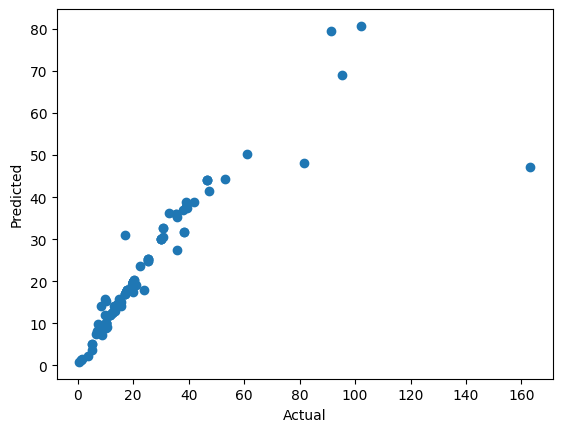

In [26]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

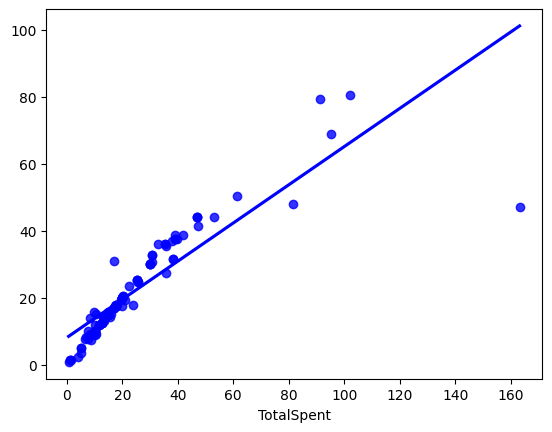

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');

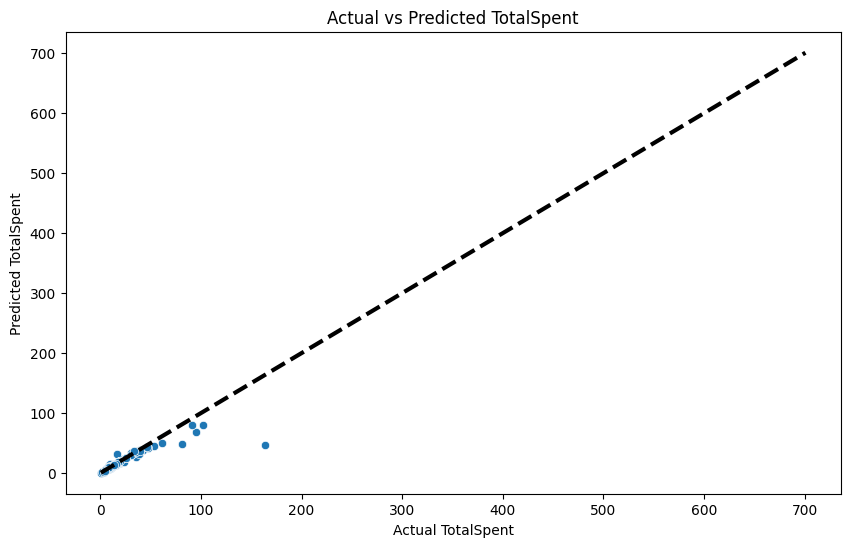

In [23]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual TotalSpent')
plt.ylabel('Predicted TotalSpent')
plt.title('Actual vs Predicted TotalSpent')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)  # Line for reference
plt.show()